In [4]:
import pandas as pd
import numpy as np
#load data
dataset = pd.read_csv("WPRWeekly_2.csv")
dataset.head()

,State/UT,Rural Male,Rural Female,Rural Male + Rural Female,Urban Male,Urban Female,Urban Male + Urban Female,Rural Male + Urban Male,Rural Female + Urban Female,Rural Male + Urban Male + Rural Female + Urban Female
0,AP,805,544,671.0,768.0,221,498,792,435,612
1,AN,725,411,NaN,675.0,195,456,715,371,548
2,Am,813,157,494.0,NaN,117,459,810,152,490
3,Bh,768,65,431.0,649.0,61,383,756,65,426
4,Ch,795,514,655.0,733.0,328,537,781,473,628


In [136]:
print (dataset['Rural Male + Rural Female'])
print (dataset['Rural Male + Rural Female'].isnull())

0     671.0
1       NaN
2     494.0
3     431.0
4     655.0
5     490.0
6     527.0
7     633.0
8     495.0
9     698.0
10    511.0
11    539.0
12    613.0
Name: Rural Male + Rural Female, dtype: float64
0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
Name: Rural Male + Rural Female, dtype: bool


In [137]:
print (dataset['Urban Male'])
print (dataset['Urban Male'].isnull())

0     768.0
1     675.0
2       NaN
3     649.0
4     733.0
5     757.0
6     738.0
7     846.0
8     740.0
9     796.0
10    737.0
11    729.0
12    788.0
Name: Urban Male, dtype: float64
0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
Name: Urban Male, dtype: bool


missing_values=["NAN","NA","--"]
dataset = pd.read_csv("WPRWeekly_2.csv",na_values=missing_values)

In [138]:
missing_values=["NA","NAN","--"]
dataset = pd.read_csv("WPRWeekly_2.csv",na_values=missing_values)
print (dataset['Urban Male'])
print (dataset['Urban Male'].isnull())

0     768.0
1     675.0
2       NaN
3     649.0
4     733.0
5     757.0
6     738.0
7     846.0
8     740.0
9     796.0
10    737.0
11    729.0
12    788.0
Name: Urban Male, dtype: float64
0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
Name: Urban Male, dtype: bool


In [139]:
print (dataset.isnull().sum())

State/UT                                                 0
Rural Male                                               0
Rural Female                                             0
Rural Male + Rural Female                                1
Urban Male                                               1
Urban Female                                             0
Urban Male + Urban Female                                0
Rural Male + Urban Male                                  0
Rural Female + Urban Female                              0
Rural Male + Urban Male + Rural Female + Urban Female    0
dtype: int64


In [140]:
print (dataset.isnull().sum().sum())

2


In [141]:
print (dataset['Rural Male + Rural Female'])
median = dataset['Rural Male + Rural Female'].median()
print (median)
dataset['Rural Male + Rural Female'].fillna(median, inplace=True)
print(dataset['Rural Male + Rural Female'])

0     671.0
1       NaN
2     494.0
3     431.0
4     655.0
5     490.0
6     527.0
7     633.0
8     495.0
9     698.0
10    511.0
11    539.0
12    613.0
Name: Rural Male + Rural Female, dtype: float64
533.0
0     671.0
1     533.0
2     494.0
3     431.0
4     655.0
5     490.0
6     527.0
7     633.0
8     495.0
9     698.0
10    511.0
11    539.0
12    613.0
Name: Rural Male + Rural Female, dtype: float64


In [142]:
print (dataset['Urban Male'])
median = dataset['Urban Male'].median()
print (median)
dataset['Urban Male'].fillna(median, inplace=True)
print(dataset['Urban Male'])

0     768.0
1     675.0
2       NaN
3     649.0
4     733.0
5     757.0
6     738.0
7     846.0
8     740.0
9     796.0
10    737.0
11    729.0
12    788.0
Name: Urban Male, dtype: float64
739.0
0     768.0
1     675.0
2     739.0
3     649.0
4     733.0
5     757.0
6     738.0
7     846.0
8     740.0
9     796.0
10    737.0
11    729.0
12    788.0
Name: Urban Male, dtype: float64


In [143]:
#Train Dataset
x = dataset[['Rural Male','Rural Female']]
y = dataset['Rural Male + Rural Female']

In [144]:
x

,Rural Male,Rural Female
0,805,544
1,725,411
2,813,157
3,768,65
4,795,514
5,744,168
6,773,276
7,866,381
8,755,200
9,757,644


In [145]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [146]:
x_train

,Rural Male,Rural Female
3,768,65
6,773,276
5,744,168
4,795,514
12,829,390
10,734,270
0,805,544
7,866,381
2,813,157
9,757,644


In [147]:
#Test Dataset
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [148]:
clf.fit(x_train,y_train)

LinearRegression()

In [149]:
clf.predict(x_test)

array([492.20922479, 546.63701328, 575.63725296])

In [150]:
y_test

8     495.0
11    539.0
1     533.0
Name: Rural Male + Rural Female, dtype: float64

In [151]:
clf.score(x_test,y_test)

-0.6546086693488216

In [152]:
dataset.corr()

,Rural Male,Rural Female,Rural Male + Rural Female,Urban Male,Urban Female,Urban Male + Urban Female,Rural Male + Urban Male,Rural Female + Urban Female,Rural Male + Urban Male + Rural Female + Urban Female
Rural Male,1.000000,0.086163,0.367462,0.530192,-0.002284,0.262100,0.975950,0.011276,0.260892
Rural Female,0.086163,1.000000,0.945431,0.472312,0.862640,0.787123,0.090463,0.990189,0.970884
Rural Male + Rural Female,0.367462,0.945431,1.000000,0.664240,0.815379,0.854634,0.387100,0.914668,0.981712
Urban Male,0.530192,0.472312,0.664240,1.000000,0.426399,0.805706,0.644471,0.418887,0.606298
Urban Female,-0.002284,0.862640,0.815379,0.426399,1.000000,0.858194,0.003122,0.880704,0.848833
Urban Male + Urban Female,0.262100,0.787123,0.854634,0.805706,0.858194,1.000000,0.345115,0.777308,0.864554
Rural Male + Urban Male,0.975950,0.090463,0.387100,0.644471,0.003122,0.345115,1.000000,0.017695,0.285914
Rural Female + Urban Female,0.011276,0.990189,0.914668,0.418887,0.880704,0.777308,0.017695,1.000000,0.959811
Rural Male + Urban Male + Rural Female + Urban Female,0.260892,0.970884,0.981712,0.606298,0.848833,0.864554,0.285914,0.959811,1.000000


In [153]:
dataset.mean()

Rural Male                                               785.000000
Rural Female                                             327.153846
Rural Male + Rural Female                                560.769231
Urban Male                                               745.769231
Urban Female                                             184.000000
Urban Male + Urban Female                                481.692308
Rural Male + Urban Male                                  776.923077
Rural Female + Urban Female                              289.461538
Rural Male + Urban Male + Rural Female + Urban Female    541.615385
dtype: float64

In [154]:
dataset.max()

State/UT                                                  jk
Rural Male                                               866
Rural Female                                             644
Rural Male + Rural Female                                698
Urban Male                                               846
Urban Female                                             328
Urban Male + Urban Female                                559
Rural Male + Urban Male                                  858
Rural Female + Urban Female                              604
Rural Male + Urban Male + Rural Female + Urban Female    681
dtype: object

In [155]:
dataset.describe()

,Rural Male,Rural Female,Rural Male + Rural Female,Urban Male,Urban Female,Urban Male + Urban Female,Rural Male + Urban Male,Rural Female + Urban Female,Rural Male + Urban Male + Rural Female + Urban Female
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,785.000000,327.153846,560.769231,745.769231,184.000000,481.692308,776.923077,289.461538,541.615385
std,43.699733,170.813664,83.317819,50.005256,75.961613,51.096942,39.358315,151.184002,72.940088
min,725.000000,65.000000,431.000000,649.000000,61.000000,383.000000,715.000000,65.000000,426.000000
25%,755.000000,200.000000,495.000000,733.000000,143.000000,456.000000,756.000000,182.000000,490.000000
50%,773.000000,276.000000,533.000000,739.000000,189.000000,476.000000,762.000000,254.000000,511.000000
75%,813.000000,411.000000,633.000000,768.000000,229.000000,520.000000,810.000000,371.000000,598.000000
max,866.000000,644.000000,698.000000,846.000000,328.000000,559.000000,858.000000,604.000000,681.000000


In [156]:
import matplotlib.pyplot as plt

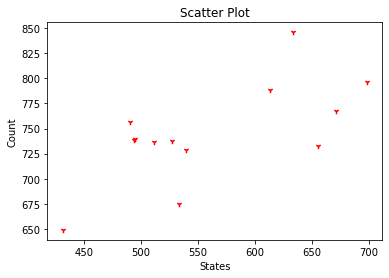

In [157]:
X = dataset["Rural Male + Rural Female"]
Y = dataset["Urban Male"]
plt.scatter(X, Y, label="stars", color="red",
            marker="1", s=30)
plt.title("Scatter Plot")
plt.xlabel("States")
plt.ylabel("Count")
plt.show()

In [7]:
new_index = ['a','b','c']
dataset.reindex(new_index, fill_value=0)

,State/UT,Rural Male,Rural Female,Rural Male + Rural Female,Urban Male,Urban Female,Urban Male + Urban Female,Rural Male + Urban Male,Rural Female + Urban Female,Rural Male + Urban Male + Rural Female + Urban Female
a,0,0,0,0.0,0.0,0,0,0,0,0
b,0,0,0,0.0,0.0,0,0,0,0,0
c,0,0,0,0.0,0.0,0,0,0,0,0
